In [1]:
import os
import sys

sys.path.append('../3_analyze')
from containers import Dataset, data_dir, stats_dir
from statistics import Statistics
from utils import stats_hist

get_ipython().magic(u'matplotlib inline')

In [2]:
stats_prots = sorted([d for d in os.listdir(data_dir) if d.split('_')[-1] != 'old' and d[0] != '.' and d != 'TRPV1'])
print stats_prots
k_list = ['sb1','sb2','sb3'] #['mcss','hbond','sb','pipi','contact']
num_ligs = 10

['5HT2B', 'A2AR', 'AR', 'B1AR', 'B2AR', 'BRAF', 'CDK2', 'CHK1', 'D2R', 'D3R', 'D4R', 'DOR', 'DTRANSP', 'ERA', 'GCR', 'GLUT1', 'JAK2', 'M3', 'MEK1', 'MGLUR5', 'MR', 'O60885', 'P00489', 'P00734', 'P00742', 'P00749', 'P00760', 'P03951', 'P07900', 'P18031', 'P24941', 'P56817', 'PLK1', 'Q16539', 'Q9Y233', 'SIGMA1', 'SMO', 'STRANSP', 'VITD']


In [3]:
all_data = Dataset(stats_prots)
ligands = {p:prot.lm.docked(prot.lm.pdb)[:num_ligs] for p,prot in all_data.proteins.items()}
st = {p:prot.lm.st for p,prot in all_data.proteins.items()}

In [4]:
alls = Statistics(ligands, st, k_list)
alls.read(data_dir, stats_dir)

sb1 P00489
sb2 P00489
sb3 P00489
sb1 5HT2B
sb2 5HT2B
sb3 5HT2B
sb1 P03951
sb2 P03951
sb3 P03951
sb1 MGLUR5
sb2 MGLUR5
sb3 MGLUR5
sb1 ERA
sb2 ERA


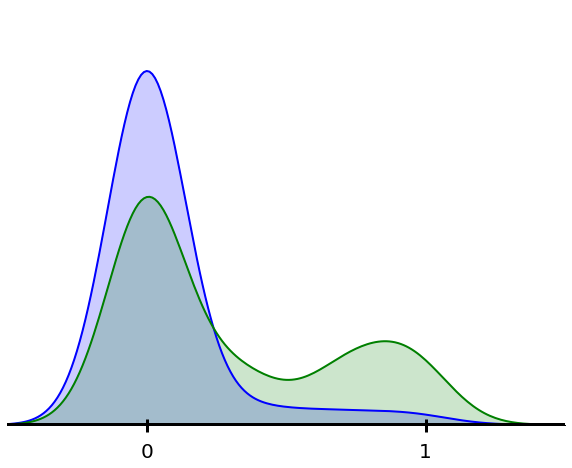

sb3 ERA


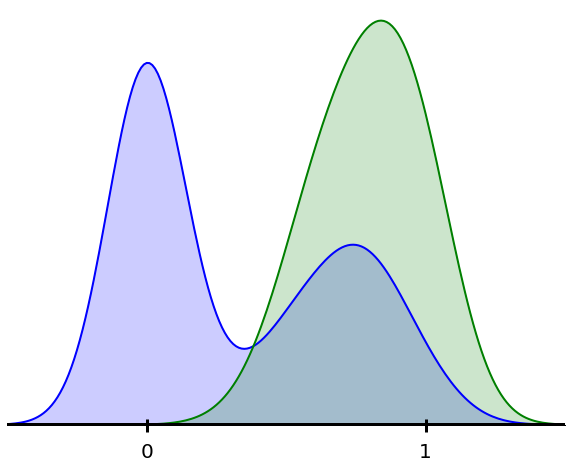

sb1 M3
sb2 M3


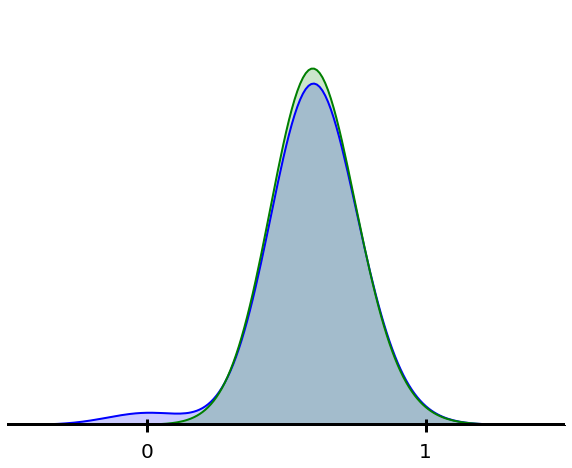

sb3 M3


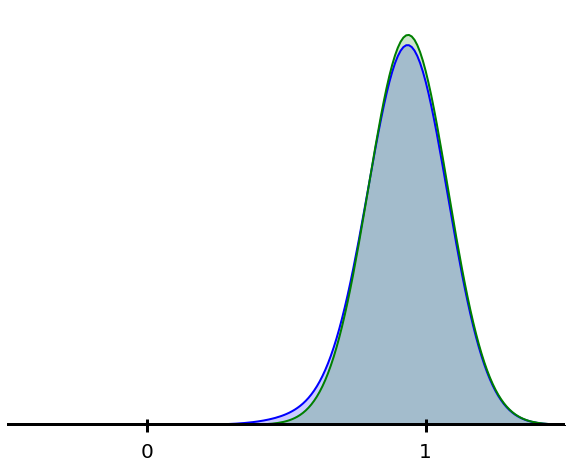

sb1 DOR
sb2 DOR
sb3 DOR
sb1 P07900


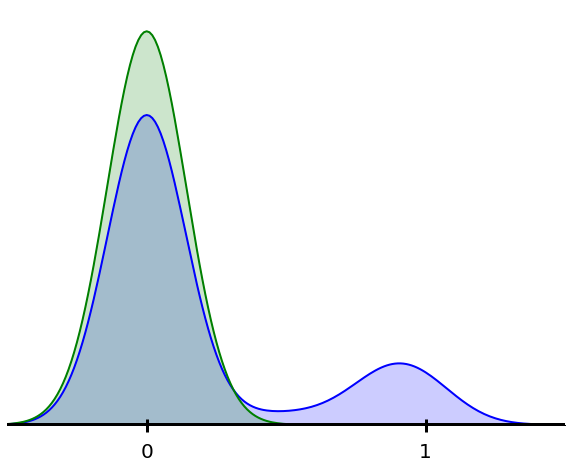

sb2 P07900


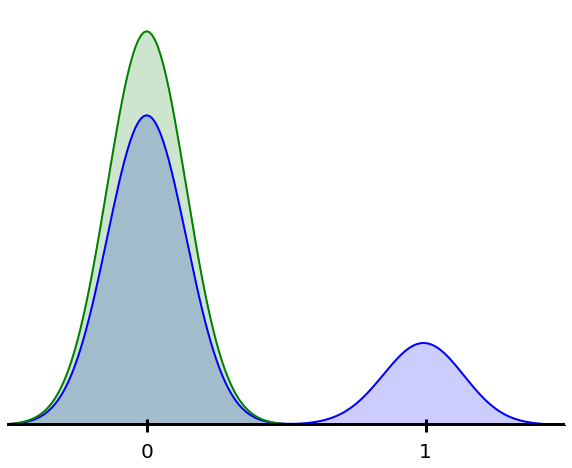

sb3 P07900


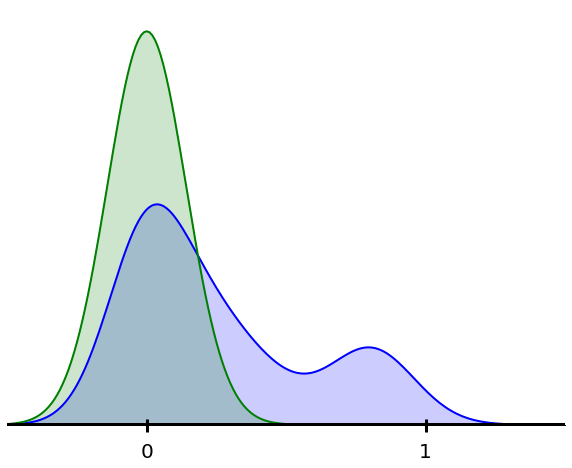

sb1 GLUT1
sb2 GLUT1
sb3 GLUT1
sb1 PLK1


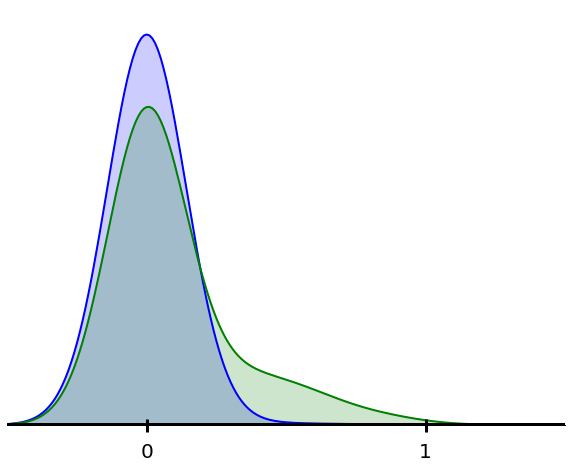

sb2 PLK1


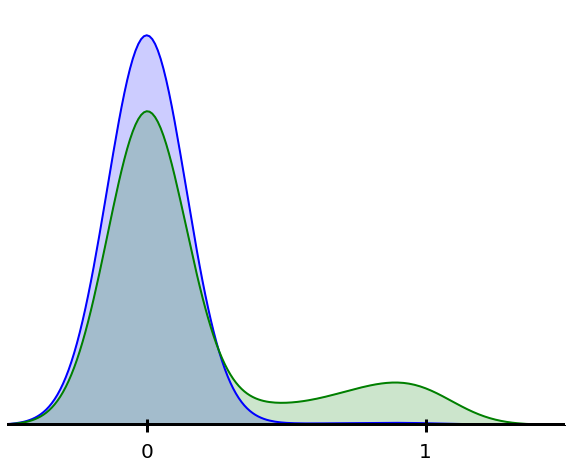

sb3 PLK1


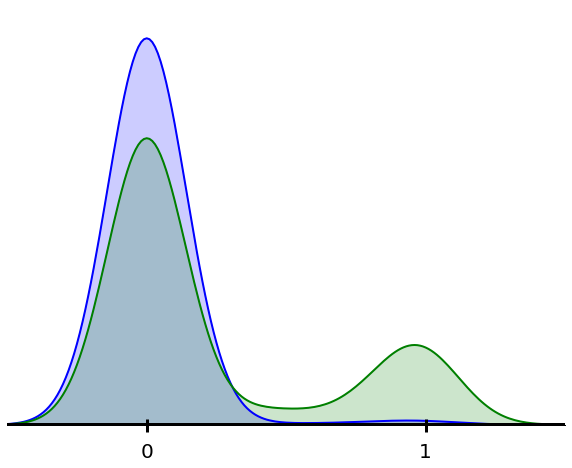

sb1 P18031


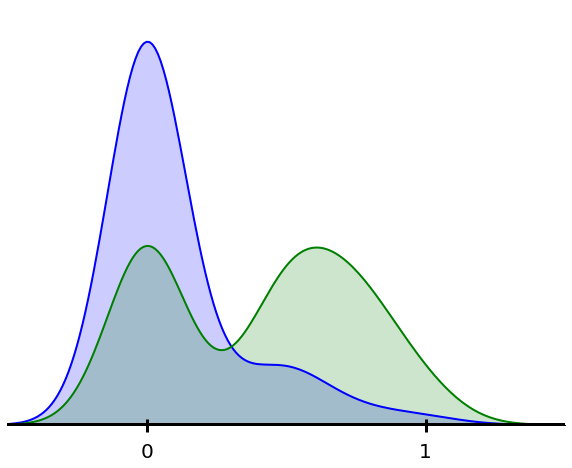

sb2 P18031


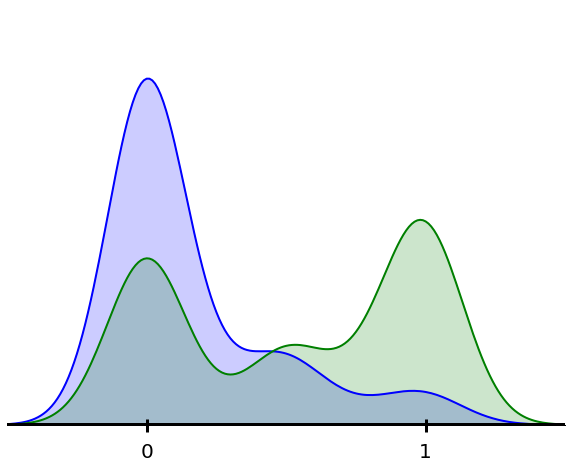

sb3 P18031


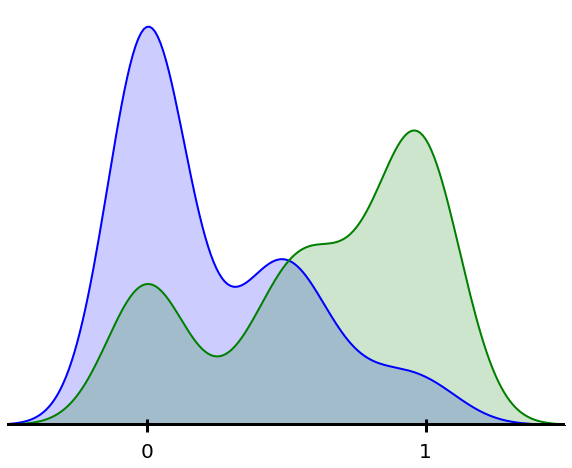

sb1 P56817


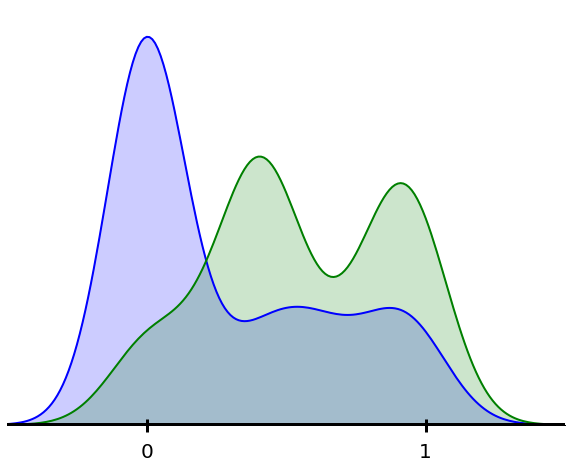

sb2 P56817


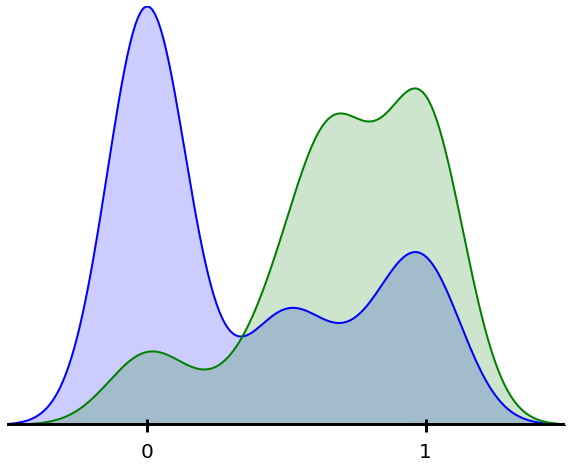

sb3 P56817


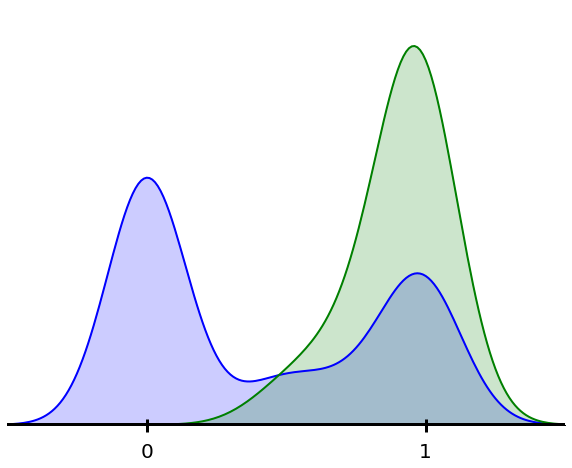

sb1 D2R


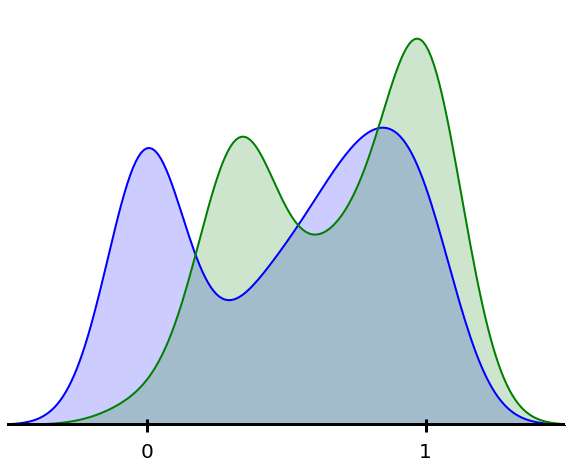

sb2 D2R


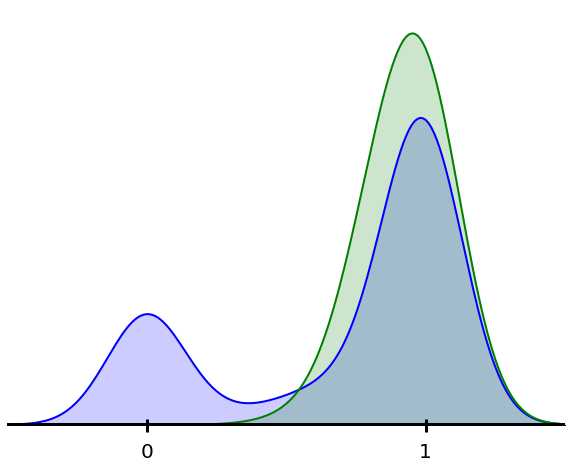

sb3 D2R


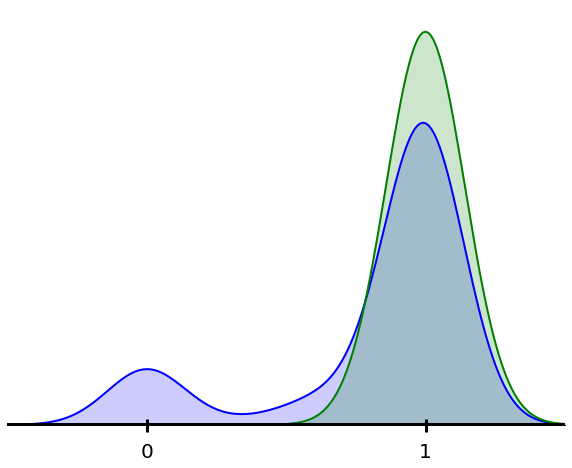

sb1 O60885
sb2 O60885
sb3 O60885
sb1 MEK1
sb2 MEK1
sb3 MEK1
sb1 JAK2
sb2 JAK2
sb3 JAK2
sb1 P00742


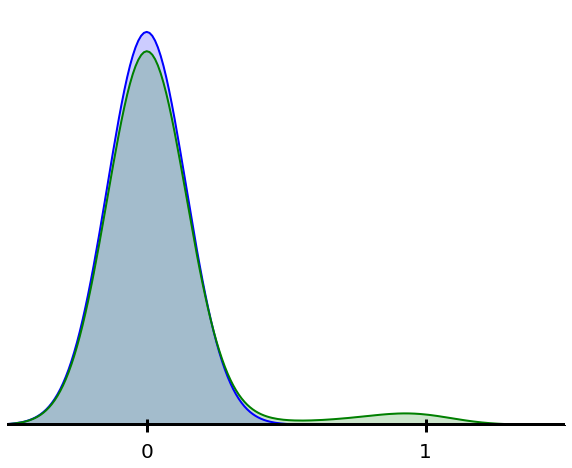

sb2 P00742


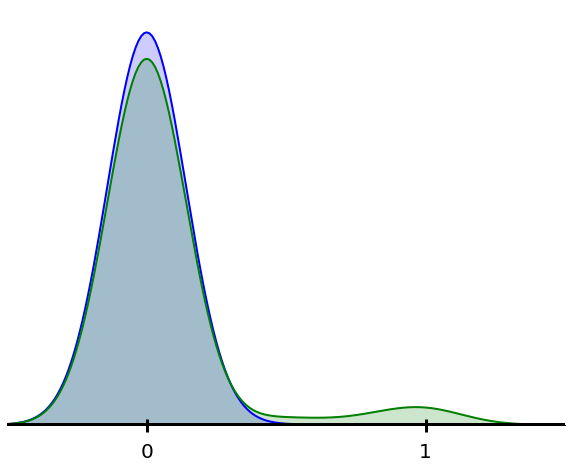

sb3 P00742


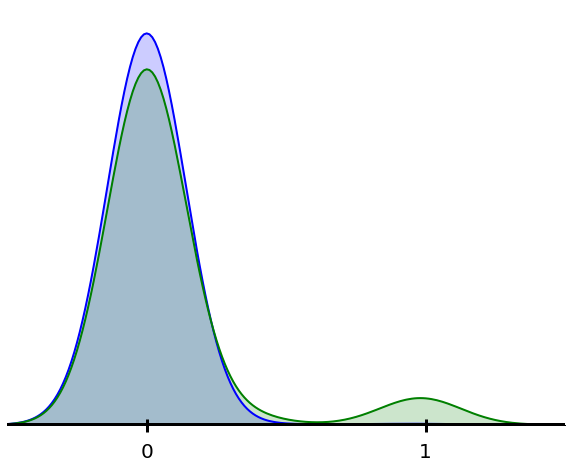

sb1 DTRANSP


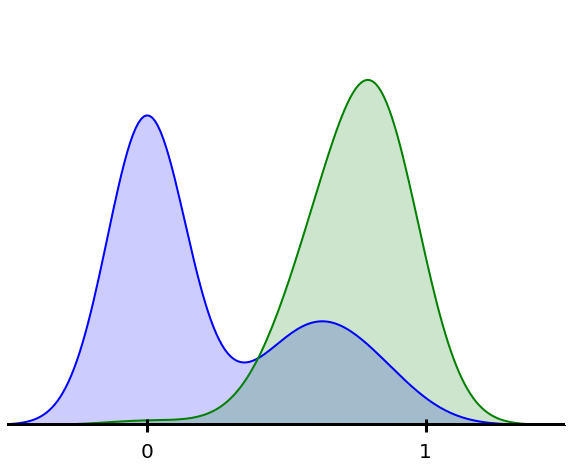

sb2 DTRANSP


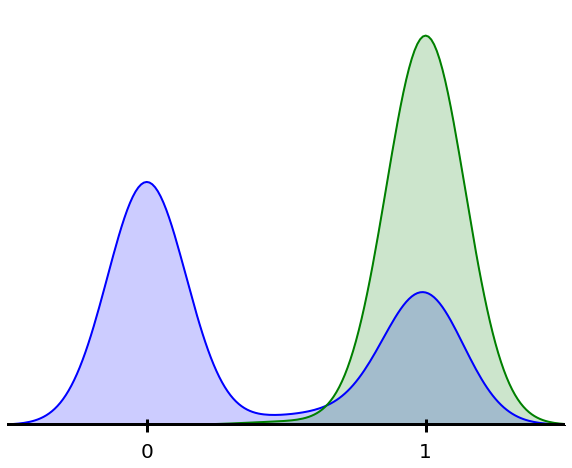

sb3 DTRANSP


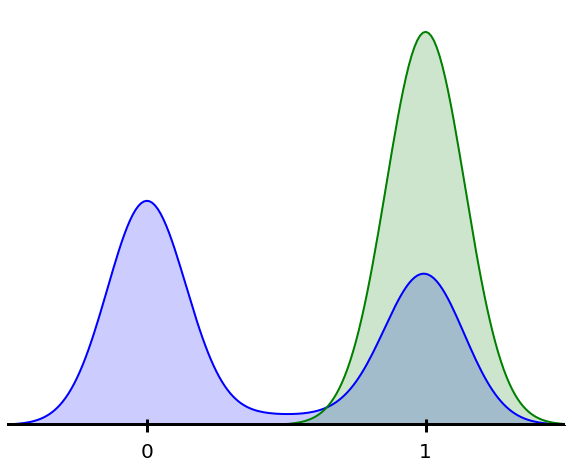

sb1 P00749


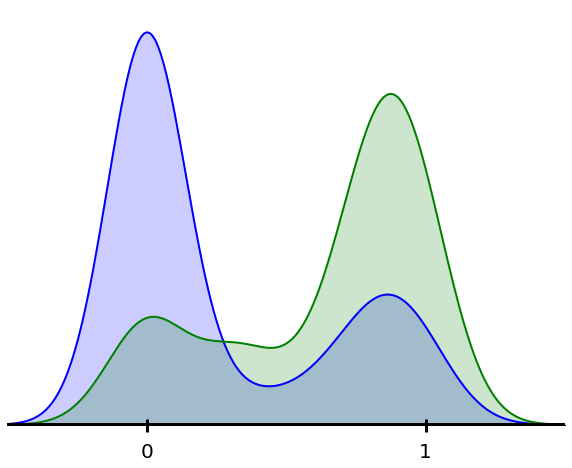

sb2 P00749


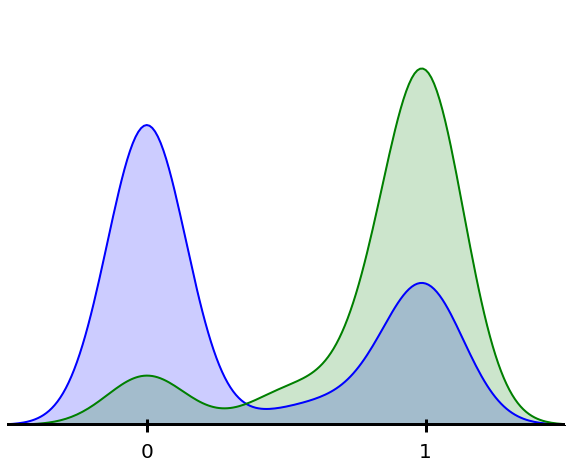

sb3 P00749


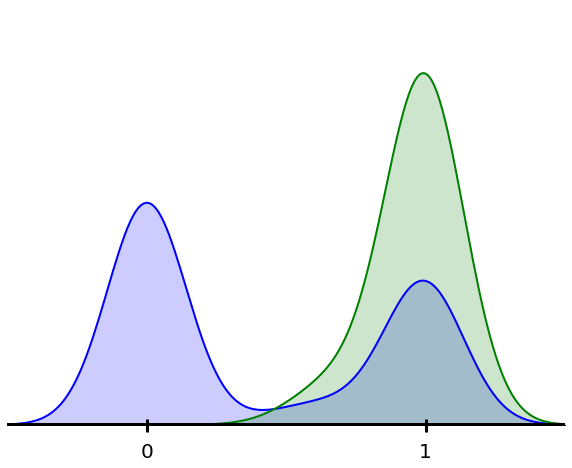

sb1 P00734


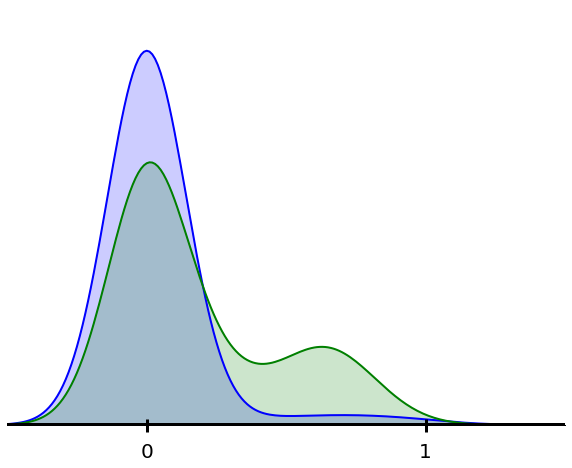

sb2 P00734


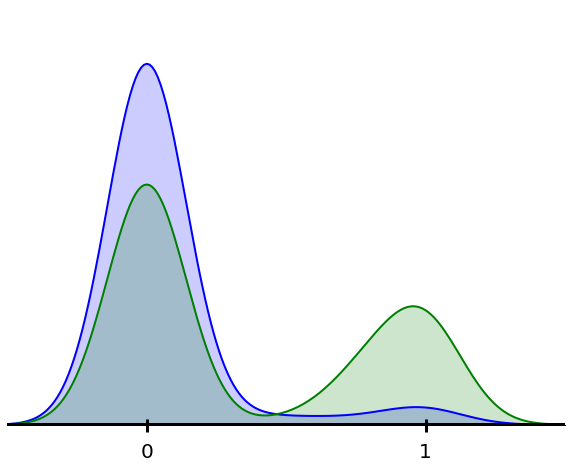

sb3 P00734


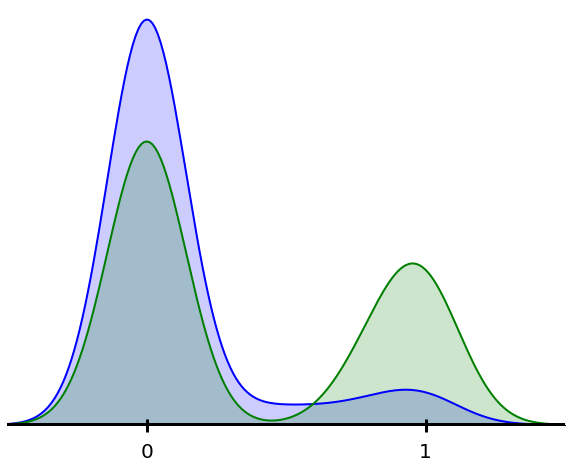

sb1 P00760


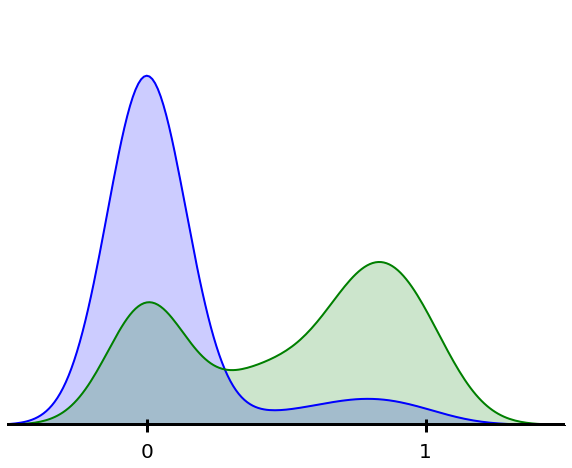

sb2 P00760


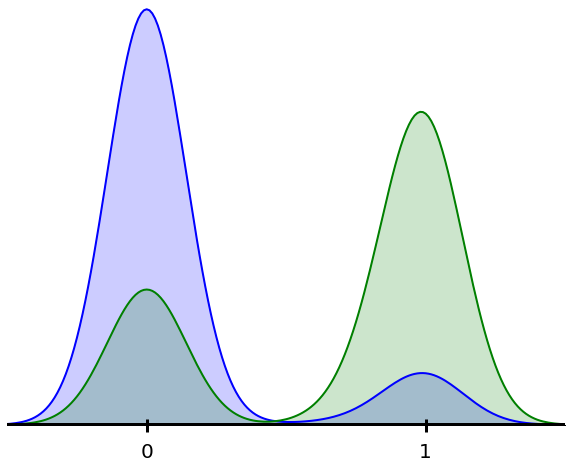

sb3 P00760


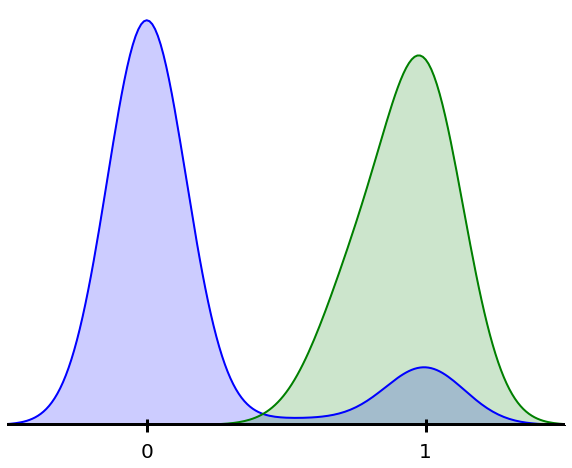

sb1 B2AR


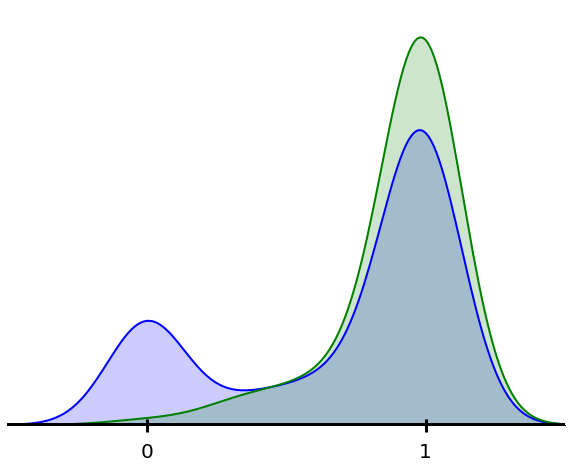

sb2 B2AR


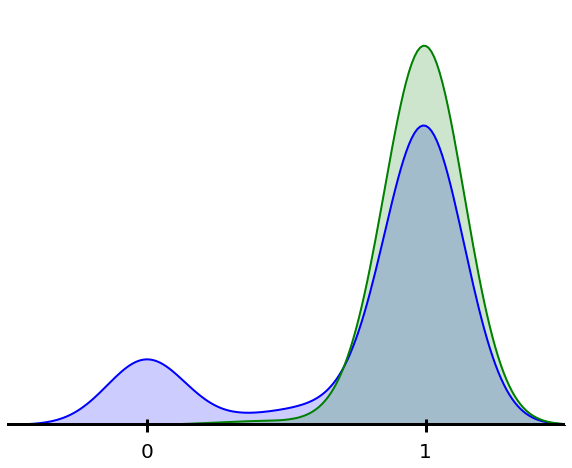

sb3 B2AR


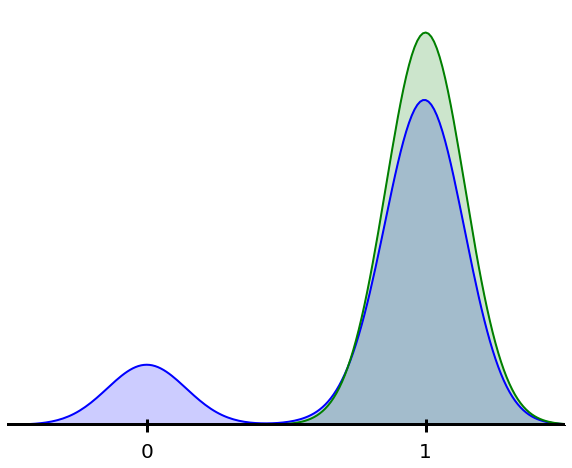

sb1 AR
sb2 AR
sb3 AR
sb1 D4R
sb2 D4R
sb3 D4R
sb1 P24941


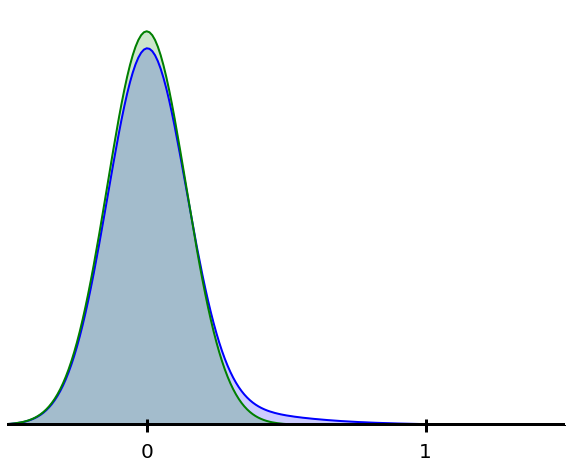

sb2 P24941


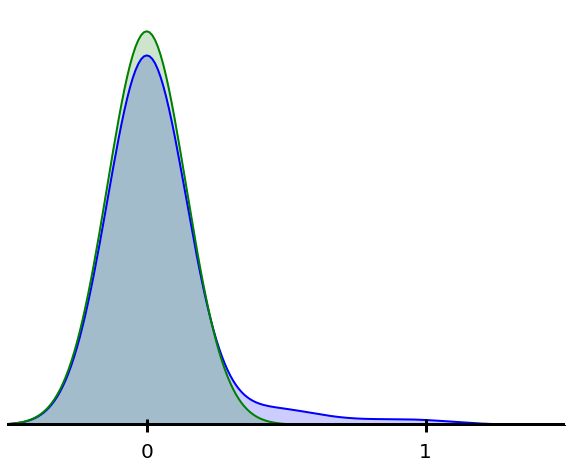

sb3 P24941


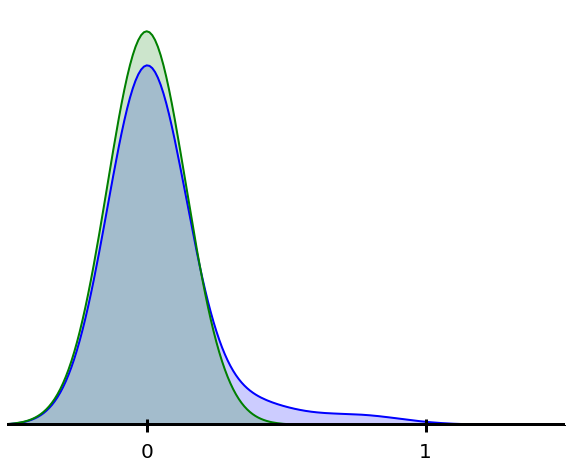

sb1 STRANSP


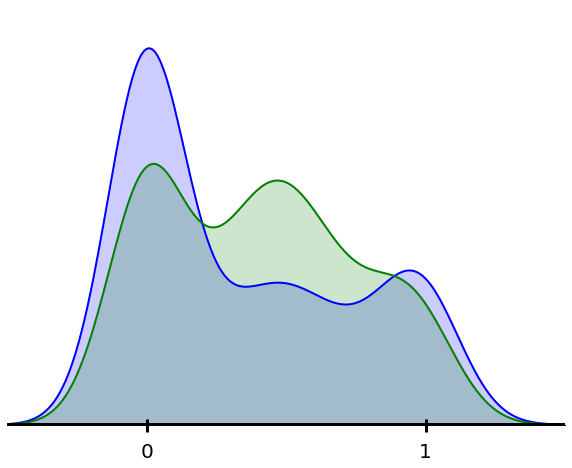

sb2 STRANSP


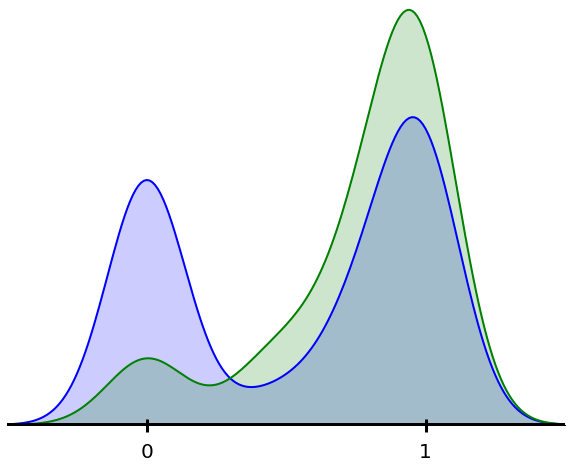

sb3 STRANSP


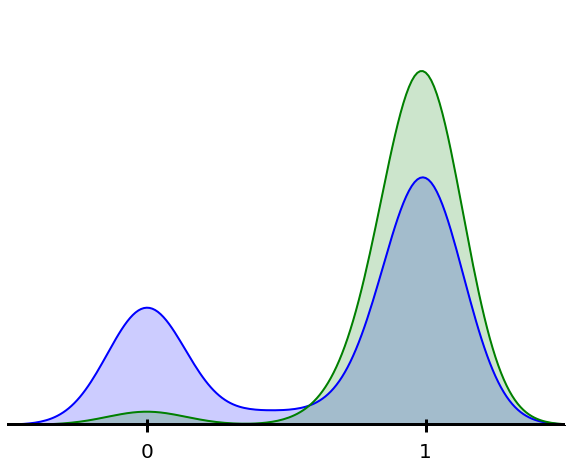

sb1 VITD
sb2 VITD
sb3 VITD
sb1 A2AR
sb2 A2AR
sb3 A2AR
sb1 SMO
sb2 SMO
sb3 SMO


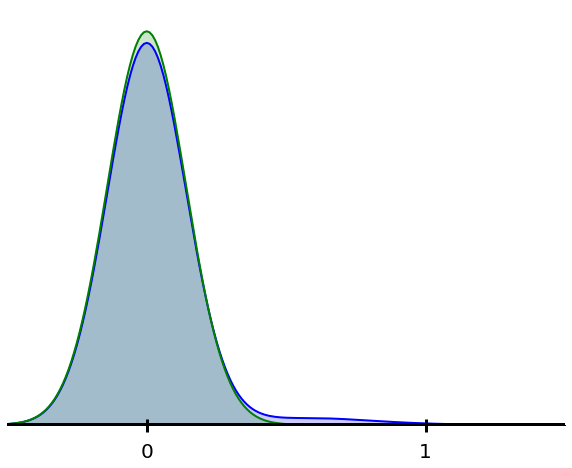

sb1 Q9Y233
sb2 Q9Y233
sb3 Q9Y233
sb1 SIGMA1


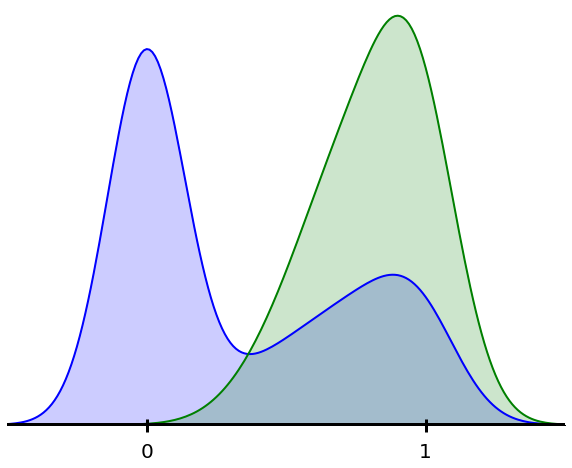

sb2 SIGMA1


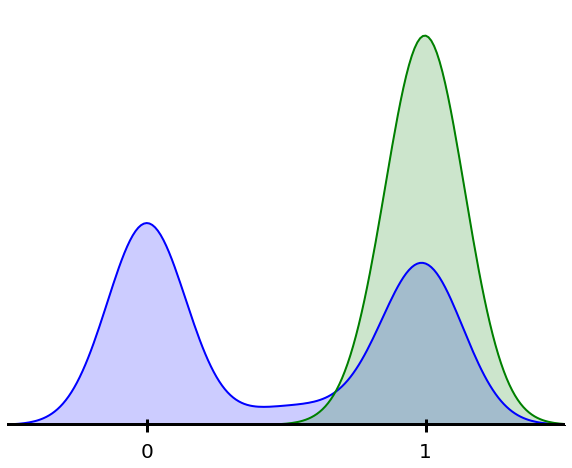

sb3 SIGMA1


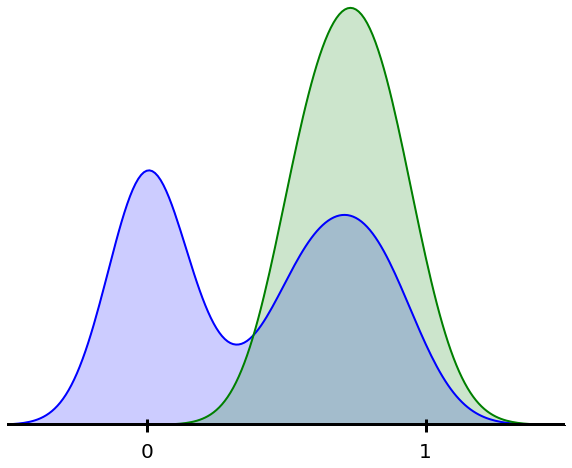

sb1 Q16539
sb2 Q16539
sb3 Q16539
sb1 D3R
sb2 D3R
sb3 D3R
sb1 CHK1
sb2 CHK1
sb3 CHK1
sb1 CDK2
sb2 CDK2
sb3 CDK2
sb1 GCR
sb2 GCR
sb3 GCR
sb1 BRAF


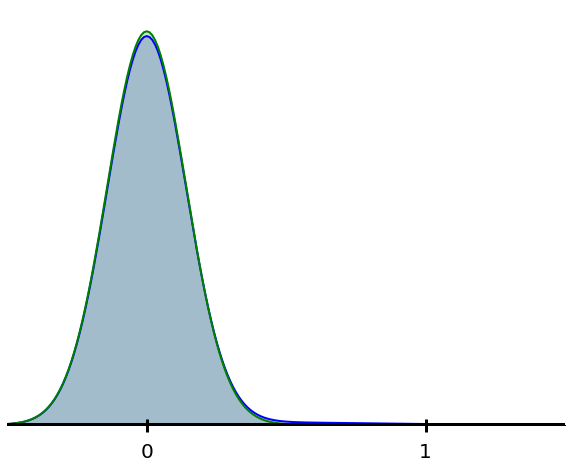

sb2 BRAF


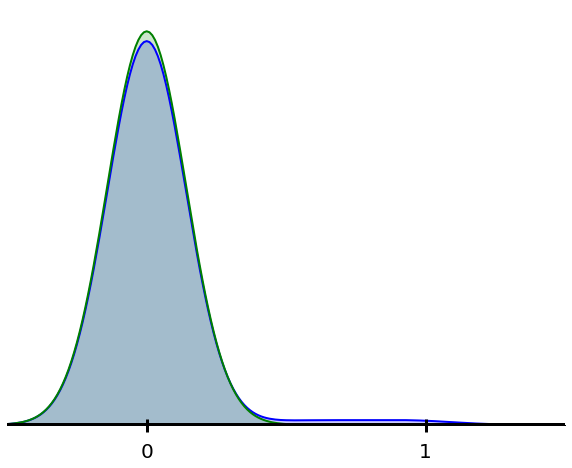

sb3 BRAF


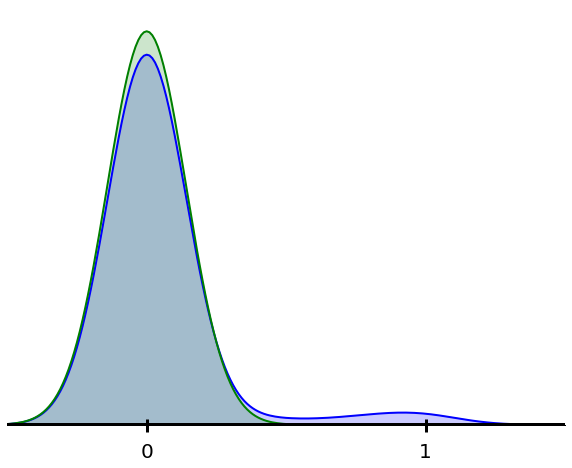

sb1 MR
sb2 MR
sb3 MR
sb1 B1AR


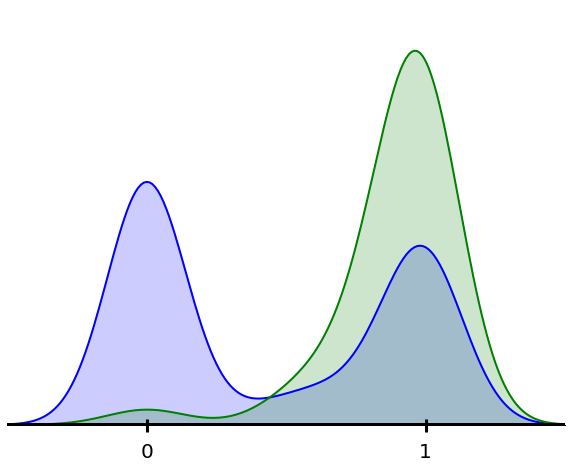

sb2 B1AR


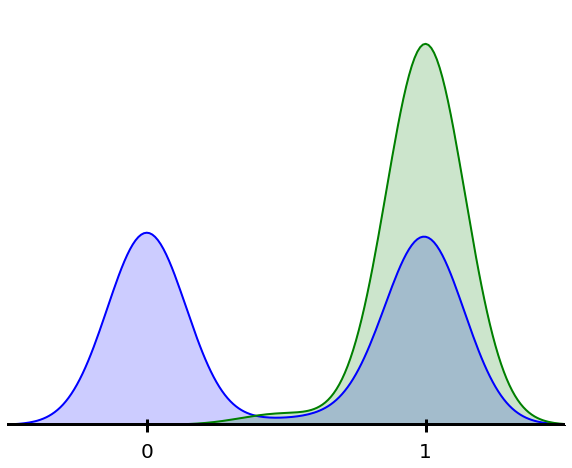

sb3 B1AR


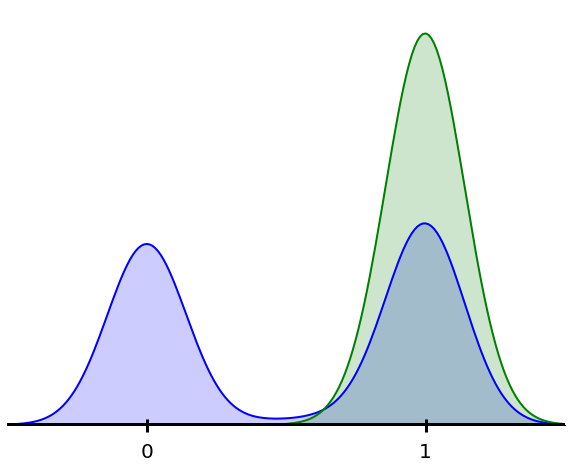

In [6]:
breakdown_by_protein = True#False
breakdown_by_ligpair = False#True

for p, prot_stats in alls.proteins.items():
    for k in k_list:
        
        native = 1
        allposes = -1
        decoy = 0
        #print k, 'all'
        #stats_hist(alls.dist[native][k],alls.dist[allposes][k])
    
        if breakdown_by_protein:
            print k, p
            stats_hist(prot_stats.dist[native][k],prot_stats.dist[allposes][k])
        
        if breakdown_by_ligpair:
            for ligpair, lp in alls.proteins[p].pairs.items():
                print k, p, ligpair
                stats_hist(lp.dist[native][k],lp.dist[allposes][k])
    